In [2]:
import jpegio as jio
import numpy as np
import cv2

In [16]:
cover_path = r'E:/Third_test/JPEG_SIS/lena_75.jpg'


#stego_path =  r'/data-x/g10/ckj/datasets/SZUBase512_QF85_to_QF7

In [3]:
jpeg = jio.read(cover_path)
DCTcoefs = jpeg.coef_arrays[0]
sz = np.array(jpeg.coef_arrays[0].shape)
QM = jpeg.quant_tables[0]
szDct = (sz/8).astype('int')
[Col,Row] = np.meshgrid( range(8) , range(8) )
#jpeg.coef_arrays[0][112:120,144:152]
jpeg.coef_arrays[0][112:120,136:144]

NameError: name 'jio' is not defined

In [13]:
jpeg.quant_tables

array([[[ 8,  6,  5,  8, 12, 20, 26, 31],
        [ 6,  6,  7, 10, 13, 29, 30, 28],
        [ 7,  7,  8, 12, 20, 29, 35, 28],
        [ 7,  9, 11, 15, 26, 44, 40, 31],
        [ 9, 11, 19, 28, 34, 55, 52, 39],
        [12, 18, 28, 32, 41, 52, 57, 46],
        [25, 32, 39, 44, 52, 61, 60, 51],
        [36, 46, 48, 49, 56, 50, 52, 50]]], dtype=uint16)

In [13]:
import imageio
spatial_img = imageio.imread(cover_path)

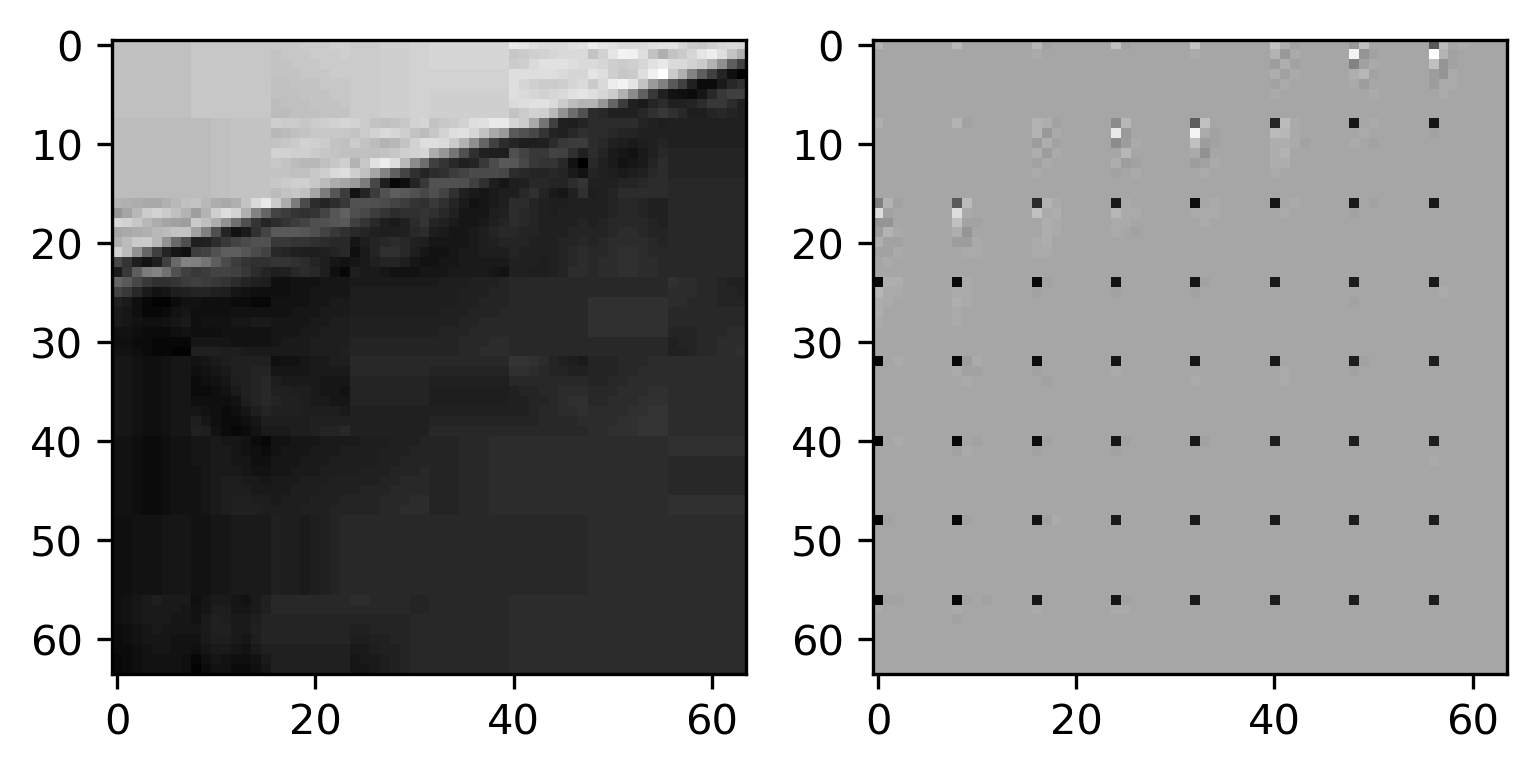

In [21]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.subplot(1,2,1)
plt.imshow(spatial_img[0:64,0:64],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(jpeg.coef_arrays[0][0:64,0:64],cmap='gray')

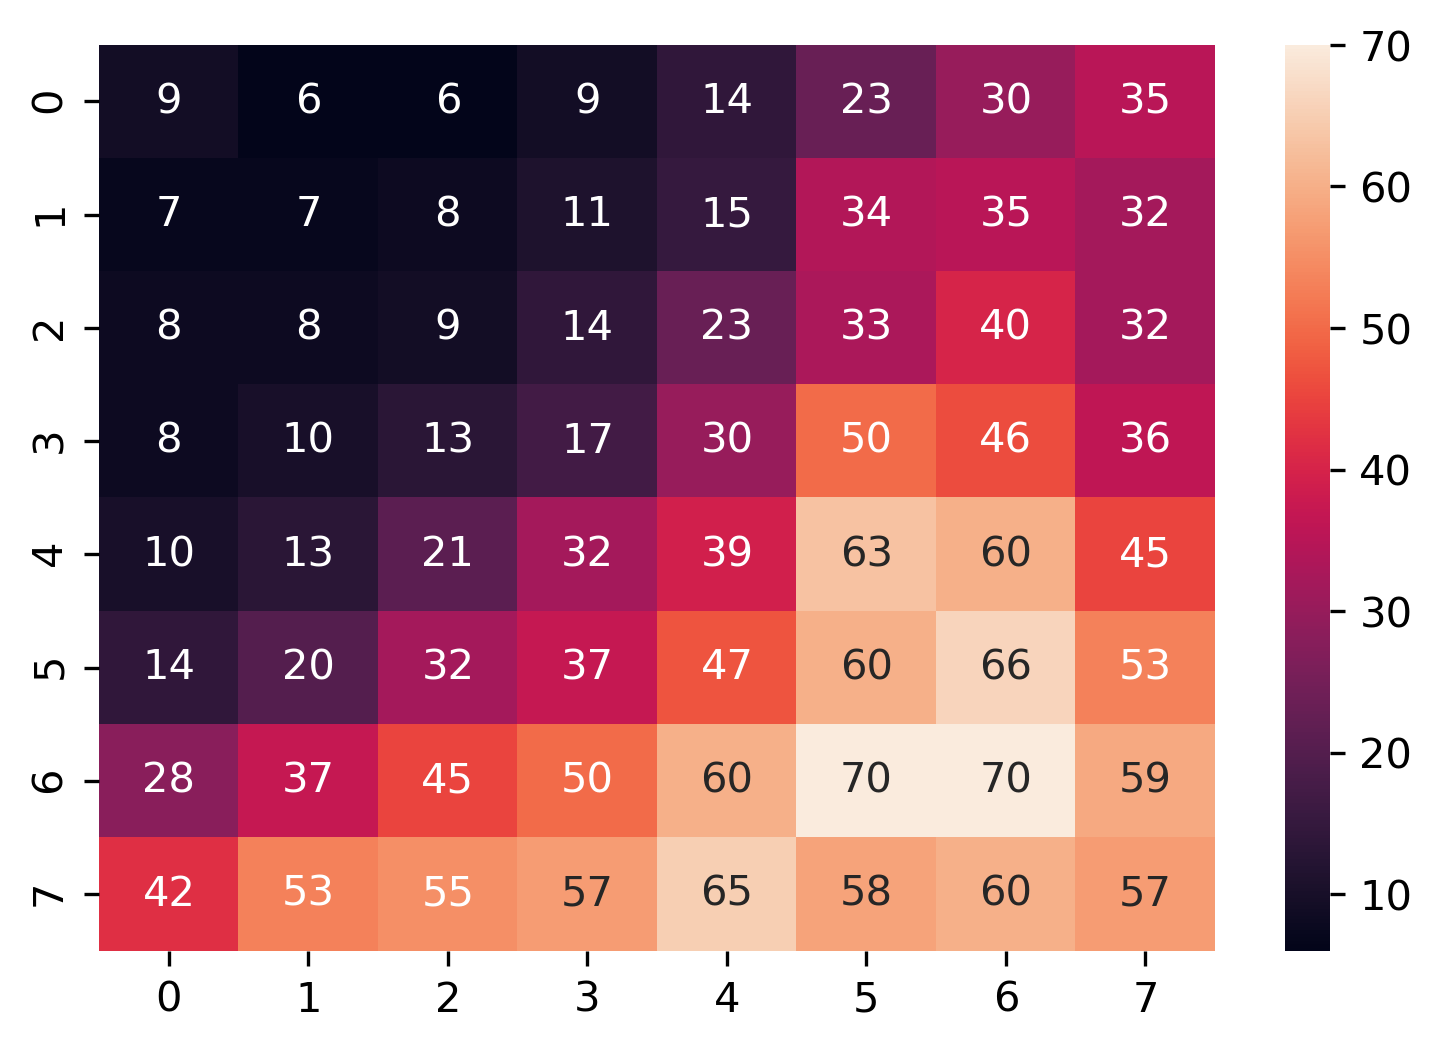

In [25]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(dpi=300)
# plt.subplot(1,2,1)
# plt.imshow(jpeg.quant_tables[0],cmap='gray')


# cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(jpeg.quant_tables[0],annot=True)


In [30]:
[Col,Row] = np.meshgrid( range(8) , range(8) )
T = 0.5 * np.cos(np.pi * (2*Col + 1) * Row / (2 * 8))
T[0,:] = T[0,:] / np.sqrt(2)

In [31]:
def DCT(spatialPixels,QM):
    DCTcoefs = np.zeros(spatialPixels.shape)
    szDct_height = np.array(spatialPixels.shape[0]/8).astype('int')
    szDct_width = np.array(spatialPixels.shape[1]/8).astype('int')
    for idxRow in range(szDct_height):
        for idxCol in range(szDct_width):
            D = spatialPixels[idxRow*8:(idxRow+1)*8 , idxCol*8:(idxCol+1)*8]
            DCTcoefs[idxRow*8:(idxRow+1)*8 , idxCol*8:(idxCol+1)*8]=np.dot(T,np.dot(D,np.transpose(T)))/QM
    return DCTcoefs

In [1]:
def IDCT(DCTcoefs,QM):
    spatialPixels = np.zeros(DCTcoefs.shape)
    szDct_height = np.array(DCTcoefs.shape[0]/8).astype('int')
    szDct_width = np.array(DCTcoefs.shape[1]/8).astype('int')
    for idxRow in range(szDct_height):
        for idxCol in range(szDct_width):
            D = DCTcoefs[idxRow*8:(idxRow+1)*8 , idxCol*8:(idxCol+1)*8]
            spatialPixels[idxRow*8:(idxRow+1)*8 , idxCol*8:(idxCol+1)*8] = np.dot( np.transpose(T) , np.dot( QM*D , T ) )
    return spatialPixels

In [2]:
spatialPixels=IDCT(DCTcoefs,QM)

NameError: name 'IDCT' is not defined

In [1]:
spatialPixels[0:8,0:8].max()

NameError: name 'spatialPixels' is not defined

In [38]:
spatialPixels[0:8,0:8].min()

3.374999999999999

In [34]:
spatialPixels[spatialPixels<-128]=-128
spatialPixels[spatialPixels>127]=127
spatialPixels=np.round(spatialPixels)+128

array([[   3.375     ,    3.375     ,    3.375     , ...,  -12.375     ,
         -12.375     ,  -12.375     ],
       [   3.375     ,    3.375     ,    3.375     , ...,  -12.375     ,
         -12.375     ,  -12.375     ],
       [   3.375     ,    3.375     ,    3.375     , ...,  -12.375     ,
         -12.375     ,  -12.375     ],
       ...,
       [-100.18397202, -102.56599611, -105.06775418, ..., -107.1831526 ,
        -107.42007745, -109.63443902],
       [ -97.71164411, -100.24121832, -102.57662128, ...,  -91.47064181,
         -85.83923678,  -85.9820474 ],
       [-100.11618134, -102.60890455, -104.70567206, ...,  -75.92241876,
         -65.78659435,  -64.05302921]])

In [8]:
DCTcoefs_r=DCT(spatialPixels,QM)

In [9]:
spatialPixels

array([[   3.375     ,    3.375     ,    3.375     , ...,  -12.375     ,
         -12.375     ,  -12.375     ],
       [   3.375     ,    3.375     ,    3.375     , ...,  -12.375     ,
         -12.375     ,  -12.375     ],
       [   3.375     ,    3.375     ,    3.375     , ...,  -12.375     ,
         -12.375     ,  -12.375     ],
       ...,
       [-100.18397202, -102.56599611, -105.06775418, ..., -107.1831526 ,
        -107.42007745, -109.63443902],
       [ -97.71164411, -100.24121832, -102.57662128, ...,  -91.47064181,
         -85.83923678,  -85.9820474 ],
       [-100.11618134, -102.60890455, -104.70567206, ...,  -75.92241876,
         -65.78659435,  -64.05302921]])

In [32]:

import pandas as pd
 
se = pd.Series(np.round(spatialPixels).astype('int').flatten())
 
countDict = dict(se.value_counts())
proportitionDict = dict(se.value_counts(normalize=True))


In [37]:
[(k,countDict[k]) for k in sorted(countDict.keys())] 

[(-139, 1),
 (-138, 2),
 (-137, 5),
 (-136, 9),
 (-135, 18),
 (-134, 36),
 (-133, 77),
 (-132, 129),
 (-131, 204),
 (-130, 372),
 (-129, 587),
 (-128, 1026),
 (-127, 1784),
 (-126, 4041),
 (-125, 4434),
 (-124, 4257),
 (-123, 3951),
 (-122, 3678),
 (-121, 3518),
 (-120, 3069),
 (-119, 2760),
 (-118, 2629),
 (-117, 2442),
 (-116, 2340),
 (-115, 2112),
 (-114, 1911),
 (-113, 1832),
 (-112, 1772),
 (-111, 1734),
 (-110, 1724),
 (-109, 1696),
 (-108, 1785),
 (-107, 1623),
 (-106, 1495),
 (-105, 1429),
 (-104, 1421),
 (-103, 1357),
 (-102, 1186),
 (-101, 1191),
 (-100, 1131),
 (-99, 1031),
 (-98, 983),
 (-97, 904),
 (-96, 928),
 (-95, 924),
 (-94, 872),
 (-93, 876),
 (-92, 817),
 (-91, 876),
 (-90, 809),
 (-89, 767),
 (-88, 783),
 (-87, 807),
 (-86, 829),
 (-85, 830),
 (-84, 875),
 (-83, 788),
 (-82, 863),
 (-81, 869),
 (-80, 897),
 (-79, 916),
 (-78, 968),
 (-77, 960),
 (-76, 960),
 (-75, 866),
 (-74, 907),
 (-73, 779),
 (-72, 729),
 (-71, 738),
 (-70, 698),
 (-69, 724),
 (-68, 682),
 (-67

<BarContainer object of 236 artists>

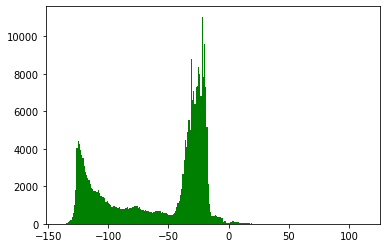

In [47]:
plt.bar(countDict.keys(), countDict.values(), width=1.0, color='g')